In [ ]:
!pip install kaldiio

In [ ]:
!pip install keras-tuner

In [ ]:
import kaldiio
import pandas as pd

temp = []
temp1 = []
dictlist = []
dictlist1 = []
d = kaldiio.load_ark('StressDat_trillv3.ark')  # d is a generator object
for key, numpy_array in d:
    temp = key
    temp1 = numpy_array
    dictlist.append(temp)
    dictlist1.append(temp1)
df = pd.DataFrame(list(zip(dictlist, dictlist1)),
               columns =['FILE', 'features'])

In [ ]:
df

In [ ]:
import pandas as pd
import os
import librosa
import numpy as np
audio_dataset_path=r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat'
header_list = ["FILE", "Annotators", "SCORE"]
metadata=pd.read_csv(r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat\StressDat-anotacia-29spk_v1_normalize_all_scores.txt',sep="\t",names=header_list)
conditions = [
    (metadata['SCORE'] <= 20),
    (metadata['SCORE'] > 20) & (metadata['SCORE'] <= 40),
    (metadata['SCORE'] > 40)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'med', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
metadata['SCALE'] = np.select(conditions, values)
# display updated DataFrame
metadata.head()

In [ ]:
metadata=pd.read_csv(r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat\modified.csv',sep="\t")

metadata.rename(columns={'V1': 'FILE', 'V2': 'Annotators', 'V3': 'SCORE'}, inplace=True)
# display updated DataFrame
metadata.head()

In [ ]:
import pandas as pd
X1= pd.merge(metadata, df, on='FILE', how='inner')

In [ ]:
X1

In [ ]:
extracted_features_df = X1[["SCALE","features"]]
extracted_features_df.columns=['class_label','feature']
extracted_features_df.to_pickle("newtrill_features512_1D.pkl",protocol=4)

In [ ]:
extracted_features_df
extracted_features_df.to_pickle("trill_features51_1D.pkl")


In [4]:
import pickle
import pandas as pd
extracted_features_df = pd.read_pickle(r"C:\Users\Jay Kejriwal\Desktop\Jay\Pickle\newtrill_features512_1D.pkl")

In [5]:
extracted_features_df

,class_label,feature
0,Medium,"[0.0161692, 0.0390885, -0.0046351, -0.0020949,..."
1,Medium,"[0.0168201, -0.0282048, 0.039324, -0.0603364, ..."
2,Medium,"[-0.0064451, -0.0812835, -0.0166688, -0.015342..."
3,High,"[0.01027, 0.0524941, -0.0217838, 0.0042399, -0..."
4,Medium,"[-0.055569, 0.0133011, 0.034179, -0.0342438, -..."
...,...,...
12784,Low,"[-0.0468368, -0.0192087, -0.01929, -0.0296526,..."
12785,Low,"[-0.0222033, -0.0192389, 0.0137476, 0.0044978,..."
12786,Medium,"[0.0566024, -0.0882919, 0.0271667, -0.0018073,..."
12787,Low,"[-0.0077951, -0.0332874, 0.0201664, 0.0020362,..."


In [ ]:
import numpy as np
### Split the dataset into independent and dependent dataset

X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class_label'].tolist())

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
y

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=np.array(extracted_features_df['class'].tolist())
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(512,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])
#New Trill vectors
#0.9394975900650024
#0.808444082736969


#Trill vectors
#0.9453712105751038
#0.8154506683349609


#Xvectors
#0.8511364459991455
#0.7943815588951111

In [ ]:
###########CNN

In [7]:
extracted_features_df['class_label']
extracted_features_df['class_label'].replace({"Medium": 1, "High": 2,"Low":0}, inplace=True)

In [8]:
import numpy as np
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class_label'].tolist())

In [9]:
X.shape


(12789, 512)

In [10]:
y.shape

(12789,)

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=np.array(extracted_features_df['class_label'].tolist())
y=to_categorical(labelencoder.fit_transform(y))

In [12]:
y.shape

(12789, 3)

In [13]:
### Train Test Split
num_classes = 3;

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
Y_train_ann_cnn = y_train
Y_test_ann_cnn = y_test

print(Y_train_ann_cnn.shape,Y_test_ann_cnn.shape,X_train_cnn.shape,X_test_cnn.shape)


(10231, 3) (2558, 3) (10231, 512, 1) (2558, 512, 1)


In [19]:
from tensorflow.keras.layers import Convolution1D, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Convolution1D, MaxPooling1D
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Convolution1D, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Convolution1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
from kerastuner import RandomSearch
import keras_tuner
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [40]:

model = Sequential()
model.add(Conv1D(filters=16, input_shape=X_train_cnn.shape[1:], kernel_size=2, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

#model.add(Conv1D(filters=64, kernel_size=2, activation='relu',padding='same'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))

#model.add(Conv1D(filters=128, kernel_size=2, activation='relu',padding='same'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))
#model.add(GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 512, 16)           48        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 256, 16)           0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 256, 32)           1056      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 128, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification54.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train_cnn, Y_train_ann_cnn, batch_size=num_batch_size, epochs=num_epochs, 
                   validation_data=(X_test_cnn, Y_test_ann_cnn), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

#94
#80


Epoch 1/100
320/320 [==============================] - 8s 24ms/step - loss: 0.9149 - accuracy: 0.5267 - val_loss: 0.5478 - val_accuracy: 0.7553

Epoch 00001: val_loss improved from inf to 0.54781, saving model to saved_models\audio_classification54.hdf5
Epoch 2/100
320/320 [==============================] - 7s 22ms/step - loss: 0.5882 - accuracy: 0.7361 - val_loss: 0.5189 - val_accuracy: 0.7694

Epoch 00002: val_loss improved from 0.54781 to 0.51890, saving model to saved_models\audio_classification54.hdf5
Epoch 3/100
320/320 [==============================] - 5s 16ms/step - loss: 0.5490 - accuracy: 0.7538 - val_loss: 0.4924 - val_accuracy: 0.7823

Epoch 00003: val_loss improved from 0.51890 to 0.49235, saving model to saved_models\audio_classification54.hdf5
Epoch 4/100
320/320 [==============================] - 4s 14ms/step - loss: 0.5348 - accuracy: 0.7601 - val_loss: 0.4891 - val_accuracy: 0.7834

Epoch 00004: val_loss improved from 0.49235 to 0.48909, saving model to saved_models\


Epoch 00039: val_loss did not improve from 0.45085
Epoch 40/100
320/320 [==============================] - 5s 17ms/step - loss: 0.2915 - accuracy: 0.8736 - val_loss: 0.4881 - val_accuracy: 0.8069

Epoch 00040: val_loss did not improve from 0.45085
Epoch 41/100
320/320 [==============================] - 5s 17ms/step - loss: 0.2814 - accuracy: 0.8833 - val_loss: 0.5060 - val_accuracy: 0.7932

Epoch 00041: val_loss did not improve from 0.45085
Epoch 42/100
320/320 [==============================] - 6s 17ms/step - loss: 0.2881 - accuracy: 0.8770 - val_loss: 0.5028 - val_accuracy: 0.8069

Epoch 00042: val_loss did not improve from 0.45085
Epoch 43/100
320/320 [==============================] - 5s 17ms/step - loss: 0.2985 - accuracy: 0.8694 - val_loss: 0.5221 - val_accuracy: 0.7979

Epoch 00043: val_loss did not improve from 0.45085
Epoch 44/100
320/320 [==============================] - 5s 17ms/step - loss: 0.2934 - accuracy: 0.8737 - val_loss: 0.5274 - val_accuracy: 0.8061

Epoch 00044: v

320/320 [==============================] - 5s 16ms/step - loss: 0.2007 - accuracy: 0.9193 - val_loss: 0.6084 - val_accuracy: 0.8018

Epoch 00081: val_loss did not improve from 0.45085
Epoch 82/100
320/320 [==============================] - 5s 16ms/step - loss: 0.2018 - accuracy: 0.9101 - val_loss: 0.6038 - val_accuracy: 0.7983

Epoch 00082: val_loss did not improve from 0.45085
Epoch 83/100
320/320 [==============================] - 5s 16ms/step - loss: 0.2015 - accuracy: 0.9122 - val_loss: 0.5788 - val_accuracy: 0.7975

Epoch 00083: val_loss did not improve from 0.45085
Epoch 84/100
320/320 [==============================] - 5s 17ms/step - loss: 0.1980 - accuracy: 0.9181 - val_loss: 0.6400 - val_accuracy: 0.7995

Epoch 00084: val_loss did not improve from 0.45085
Epoch 85/100
320/320 [==============================] - 5s 16ms/step - loss: 0.1923 - accuracy: 0.9171 - val_loss: 0.5990 - val_accuracy: 0.8026

Epoch 00085: val_loss did not improve from 0.45085
Epoch 86/100
320/320 [======

In [ ]:
train_accuracy=model.evaluate(X_train_cnn,Y_train_ann_cnn,verbose=0)
test_accuracy=model.evaluate(X_test_cnn,Y_test_ann_cnn,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])

#XVectors
#94
#80

#Trill vectors
#0.959516167640686
#0.8185719847679138

In [23]:
from kerastuner import RandomSearch
import keras_tuner
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras

In [24]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [2,5]),
        activation='relu',
        input_shape=X_train_cnn.shape[1:]
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [2,5]),
        activation='relu'
    ),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ),
    keras.layers.Dense(num_classes, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [25]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Stress_clasification_mfcc12")

In [26]:
tuner_search.search(X_train_cnn, Y_train_ann_cnn, epochs=3,validation_split=0.2)

Trial 5 Complete [00h 00m 31s]
val_accuracy: 0.34636053442955017

Best val_accuracy So Far: 0.7914020419120789
Total elapsed time: 00h 02m 53s
INFO:tensorflow:Oracle triggered exit


In [27]:
model=tuner_search.get_best_models(num_models=1)[0]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 511, 64)           192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 510, 48)           6192      
_________________________________________________________________
flatten (Flatten)            (None, 24480)             0         
_________________________________________________________________
dense (Dense)                (None, 208)               5092048   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 627       
Total params: 5,099,059
Trainable params: 5,099,059
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train_cnn, Y_train_ann_cnn, epochs=20, validation_split=0.1, initial_epoch=10)

Epoch 11/20
288/288 [==============================] - 13s 44ms/step - loss: 0.2420 - accuracy: 0.8994 - val_loss: 0.5714 - val_accuracy: 0.7881
Epoch 12/20
288/288 [==============================] - 12s 43ms/step - loss: 0.2043 - accuracy: 0.9167 - val_loss: 0.5532 - val_accuracy: 0.8037
Epoch 13/20
288/288 [==============================] - 12s 43ms/step - loss: 0.1865 - accuracy: 0.9241 - val_loss: 0.6214 - val_accuracy: 0.8125
Epoch 14/20
288/288 [==============================] - 13s 44ms/step - loss: 0.1546 - accuracy: 0.9383 - val_loss: 0.7025 - val_accuracy: 0.7920
Epoch 15/20
288/288 [==============================] - 13s 45ms/step - loss: 0.1212 - accuracy: 0.9521 - val_loss: 0.7329 - val_accuracy: 0.7900
Epoch 16/20
288/288 [==============================] - 13s 44ms/step - loss: 0.1069 - accuracy: 0.9607 - val_loss: 0.8279 - val_accuracy: 0.7881
Epoch 17/20
288/288 [==============================] - 12s 43ms/step - loss: 0.0839 - accuracy: 0.9679 - val_loss: 0.9508 - val_ac

In [32]:
train_accuracy=model.evaluate(X_train_cnn,Y_train_ann_cnn,verbose=0)
test_accuracy=model.evaluate(X_test_cnn,Y_test_ann_cnn,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])

0.9682338237762451
0.7920250296592712


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print("For Test Data: Full Classification Report ")
Y_test = np.argmax(Y_test_ann_cnn, axis=1) # Convert one-hot to index
y_pred = np.argmax(model.predict(X_test_cnn),axis=-1)
matrix=confusion_matrix(Y_test,y_pred)
print(matrix)
print(classification_report(Y_test, y_pred))

For Test Data: Full Classification Report 
[[774 120   0]
 [162 571 103]
 [  0 147 681]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       894
           1       0.68      0.68      0.68       836
           2       0.87      0.82      0.84       828

    accuracy                           0.79      2558
   macro avg       0.79      0.79      0.79      2558
weighted avg       0.79      0.79      0.79      2558



[[774 120   0]
 [162 571 103]
 [  0 147 681]]


<ipython-input-36-ffca020ff658>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-36-ffca020ff658>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


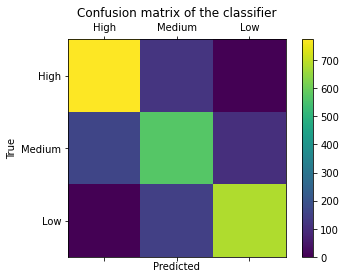

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test,y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
labels=['High','Medium','Low',]
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#New values
#0.9054
#0.8164
#Xvectors
#0.9515169262886047
#0.8010144233703613

#Trill vectors
#0.914544939994812
#0.8220834732055664

In [37]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

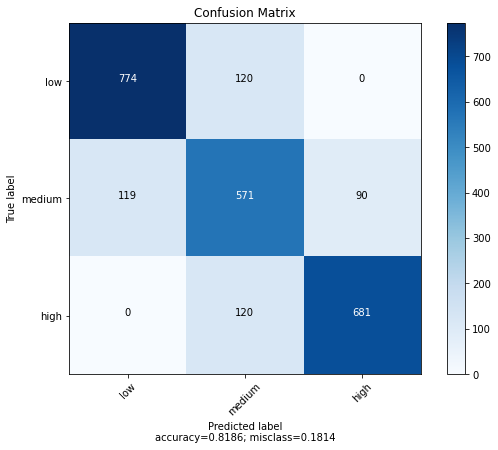

In [43]:
plot_confusion_matrix(cm           = np.array([[774, 120,   0],
                                                 [119, 571, 90],
                                                 [0, 120, 681]]), 
                      normalize    = False,
                      target_names = ['low', 'medium', 'high'],
                      title        = "Confusion Matrix")